<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [42]:
import matplotlib.pyplot as plt
import pandas as pd

In [39]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [36]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [37]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [38]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment



###  Task 1: Become familiar with the dataset
The following describes the dataset variables:

 - CRIM - per capita crime rate by town
 - ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
 - INDUS - proportion of non-retail business acres per town.
 - CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
  - NOX - nitric oxides concentration (parts per 10 million)
 - RM - average number of rooms per dwelling
 - AGE - proportion of owner-occupied units built prior to 1940
 - DIS - weighted distances to five Boston employment centres
 - RAD - index of accessibility to radial highways
 - LSTAT - % lower status of the population
 - PTRATIO - pupil-teacher ratio by town
 - MEDV - Median value of owner-occupied homes in $1000's
 - TAX - full-value property-tax rate per $10,000

In [19]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


In [24]:
boston_df.dtypes

Unnamed: 0      int64
CRIM          float64
ZN            float64
INDUS         float64
CHAS          float64
NOX           float64
RM            float64
AGE           float64
DIS           float64
RAD           float64
TAX           float64
PTRATIO       float64
LSTAT         float64
MEDV          float64
dtype: object

In [25]:
boston_df.describe()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,252.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,126.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,252.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,378.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,505.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


In [27]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   CRIM        506 non-null    float64
 2   ZN          506 non-null    float64
 3   INDUS       506 non-null    float64
 4   CHAS        506 non-null    float64
 5   NOX         506 non-null    float64
 6   RM          506 non-null    float64
 7   AGE         506 non-null    float64
 8   DIS         506 non-null    float64
 9   RAD         506 non-null    float64
 10  TAX         506 non-null    float64
 11  PTRATIO     506 non-null    float64
 12  LSTAT       506 non-null    float64
 13  MEDV        506 non-null    float64
dtypes: float64(13), int64(1)
memory usage: 55.4 KB


In [28]:
boston_df.CHAS.unique()

array([0., 1.])

In [29]:
boston_df.columns

Index(['Unnamed: 0', 'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS',
       'RAD', 'TAX', 'PTRATIO', 'LSTAT', 'MEDV'],
      dtype='object')

### Task 2: Generate Descriptive Statistics and Visualizations
## 2.1 For the "Median value of owner-occupied homes" provide a boxplot

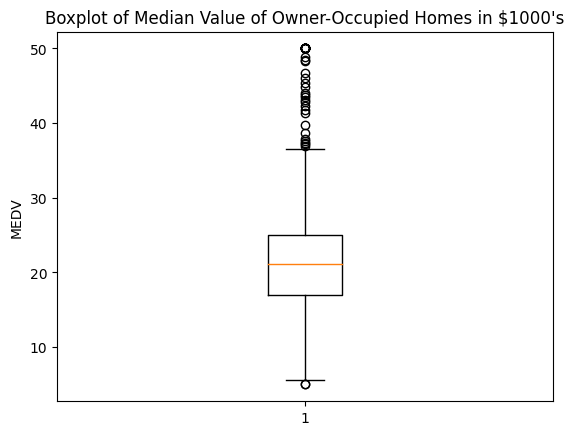

In [43]:
plt.boxplot(x=boston_df['MEDV'])
plt.title("Boxplot of Median Value of Owner-Occupied Homes in $1000's")
plt.ylabel('MEDV')
plt.show()

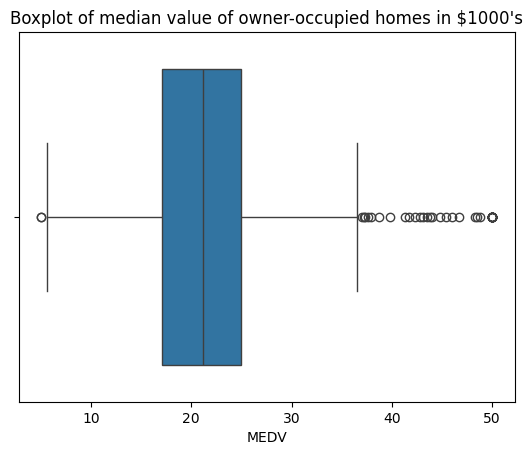

In [44]:
ax = sns.boxplot(x = 'MEDV', data = boston_df)
plt.title("Boxplot of median value of owner-occupied homes in $1000's")
plt.show()

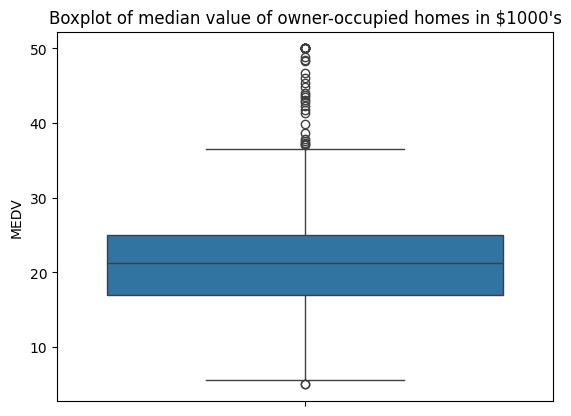

In [45]:
ax = sns.boxplot(y = 'MEDV', data = boston_df)
plt.title("Boxplot of median value of owner-occupied homes in $1000's")
plt.show()

#there are some outliers

## 2.2 Provide a bar plot for the Charles river variable

In [53]:
boston_df['CHAS'].value_counts()

CHAS
0.0    471
1.0     35
Name: count, dtype: int64

Text(0.5, 1.0, 'Bar plot for the Charles river variable')

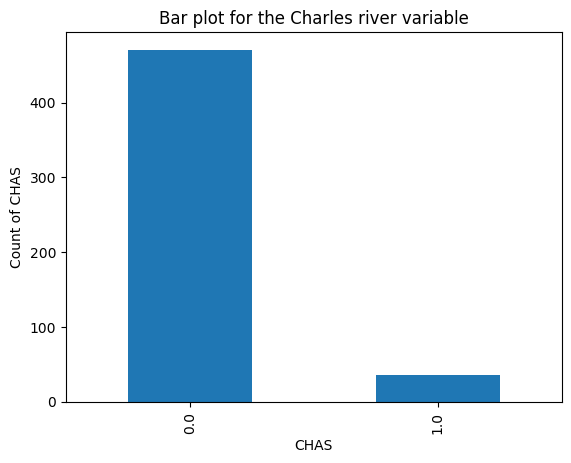

In [47]:
boston_df['CHAS'].value_counts().plot(kind = 'bar')
sns.set_style('whitegrid')
plt.xlabel('CHAS')
plt.ylabel('Count of CHAS')
plt.title('Bar plot for the Charles river variable')

#There are more houses located in track bounds of Charles river

### 2.3 Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

Text(0.5, 1.0, 'Boxplot of MEDV vs. Age Groups')

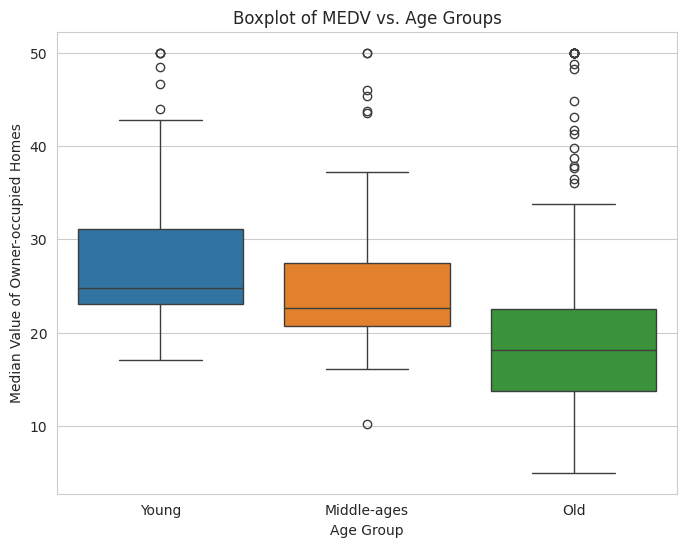

In [48]:
# Discretize AGE into three categories
boston_df['AGE_Group'] = pd.cut(boston_df['AGE'], bins = [0, 35, 70, 100], labels = ['Young', 'Middle-ages', 'Old'])

# Create the boxplot
plt.figure(figsize=(8,6))
sns.boxplot(x = 'AGE_Group', y = 'MEDV', data = boston_df, hue = 'AGE_Group')
plt.xlabel('Age Group')
plt.ylabel('Median Value of Owner-occupied Homes')
plt.title('Boxplot of MEDV vs. Age Groups')

#pd.cut() is used to divide the AGE variable into three categories.

The median value of owner-occupied homes decreases with increaing the age. It suggests most young people own the houses.

### 2.4 Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?

Text(0.5, 1.0, 'Scatter Plot NOX vs. INDUS')

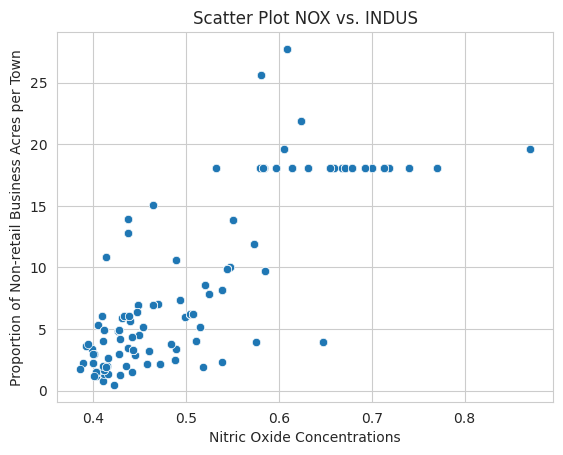

In [49]:
sns.scatterplot(x = 'NOX', y = 'INDUS', data = boston_df)
plt.xlabel('Nitric Oxide Concentrations')
plt.ylabel('Proportion of Non-retail Business Acres per Town')
plt.title('Scatter Plot NOX vs. INDUS')

##There is a positive correlation between nitric oxide concentrations and the proportion of non-retail business acres per town.

### 2.5 Create a histogram for the pupil to teacher ratio variable

Text(0.5, 1.0, 'Histogram for the Pupil to Teacher ratio')

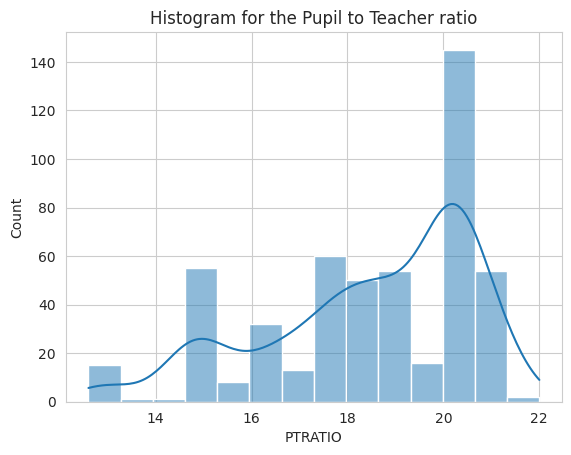

In [54]:
sns.histplot(boston_df['PTRATIO'], kde= True)
plt.title('Histogram for the Pupil to Teacher ratio')

Text(0.5, 1.0, 'Histogram for the Pupil to Teacher ratio')

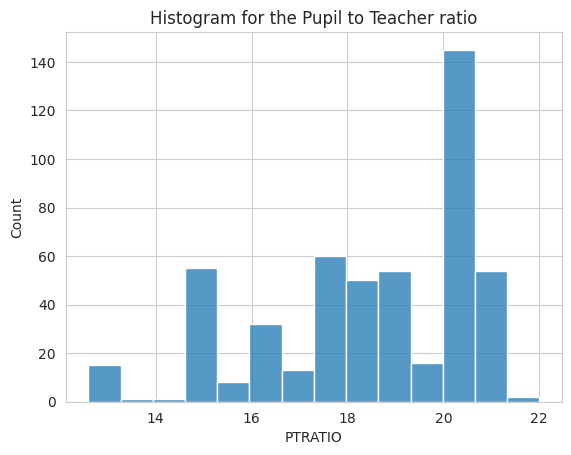

In [55]:
sns.histplot(boston_df['PTRATIO'], kde= False)
plt.title('Histogram for the Pupil to Teacher ratio')

### Task 3: Hypothesis Tests
## 3.1 Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)
H0: no difference in median value of houses bounded by the Charles river
H1: there is significant difference
Use α = 0.0

In [56]:
scipy.stats.levene(boston_df[boston_df['CHAS'] == 0]['MEDV'], 
                      boston_df[boston_df['CHAS'] == 1]['MEDV'], center= 'mean')

LeveneResult(statistic=8.75190489604598, pvalue=0.003238119367639829)

#Conclusion: Since p-value is less than 0.05, reject the null hypothesis. So there is significant difference in median value of houses bounded by the Charles river.

In [57]:
scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 0]['MEDV'], 
                      boston_df[boston_df['CHAS'] == 1]['MEDV'], equal_var= True)

TtestResult(statistic=-3.996437466090509, pvalue=7.390623170519905e-05, df=504.0)

#Conclusion: Since p-value is less than 0.05, we can not assume equal variance. It means there is significant difference in median value of houses bounded by the Charles river.

## 3.2 Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)
H0: no difference in Median values of houses (MEDV) for each age group
H1: at least one of the means differ

In [58]:
from scipy.stats import f_oneway, levene

# Discretize AGE into three categories
boston_df['AGE_Group'] = pd.cut(boston_df['AGE'], bins = [0, 35, 70, 100], labels = ['Young', 'Middle-ages', 'Old'])

print(boston_df['AGE_Group'].value_counts())


group1 = boston_df[boston_df['AGE_Group'] == 'Young']['MEDV']
group2 = boston_df[boston_df['AGE_Group'] == 'Middle-ages']['MEDV']
group3 = boston_df[boston_df['AGE_Group'] == 'Old']['MEDV']

anova_stat, p_value = f_oneway(group1, group2, group3)
print(f"ANOVA P-value: {p_value}")

AGE_Group
Old            287
Middle-ages    128
Young           91
Name: count, dtype: int64
ANOVA P-value: 1.7105011022702984e-15


In [59]:
from statsmodels.formula.api import ols
lm = ols('MEDV ~ AGE_Group', data = boston_df).fit()
table= sm.stats.anova_lm(lm)
print(table)

              df        sum_sq      mean_sq         F        PR(>F)
AGE_Group    2.0   5401.731883  2700.865942  36.40765  1.710501e-15
Residual   503.0  37314.563532    74.184023       NaN           NaN


#Conclusion: p < 0.05, at least one AGE group has a significantly different MEDV.

## 3.3 Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)
Method 1. Pearson correlation

In [60]:
scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

PearsonRResult(statistic=0.7636514469209192, pvalue=7.913361061210442e-98)

#Conclusion: p < 0.05, reject null hypothesis. We conclude that there exists a relationship between Nitric oxide concentrations and proportion of non-retail business acres per town.

#Method 2. Regression analysis

H0: no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town
H1: there is relationship

In [61]:
## X is the input variables (or independent variables)
X = boston_df['NOX']
## y is the target/dependent variable
y = boston_df['INDUS']
## add an intercept (beta_0) to our model
X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  INDUS   R-squared:                       0.583
Model:                            OLS   Adj. R-squared:                  0.582
Method:                 Least Squares   F-statistic:                     705.1
Date:                Mon, 17 Feb 2025   Prob (F-statistic):           7.91e-98
Time:                        18:46:52   Log-Likelihood:                -1470.5
No. Observations:                 506   AIC:                             2945.
Df Residuals:                     504   BIC:                             2954.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -13.9414      0.965    -14.450      0.000     -15.837     -12.046
NOX           45.2108      1.703     26.554      0.000      41.866      48.556
==============================================================================
Omnibus:                       46.050   Durbin-Watson:                   0.272
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               67.622
Skew:                           0.649   Prob(JB):                     2.07e-15
Kurtosis:                       4.233   Cond. No.                         11.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#Conclusion: p < 0.05, so there is an evdience of relationship between Nitric oxide concentrations and proportion of non-retail business acres per town

## 3.4 What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

In [62]:
## X is the input variables (or independent variables)
X = boston_df['DIS']
## y is the target/dependent variable
y = boston_df['MEDV']
## add an intercept (beta_0) to our model
X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Mon, 17 Feb 2025   Prob (F-statistic):           1.21e-08
Time:                        18:47:58   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#Conclusion: R-squared is 0.062, correlation coefficient is 0.25. Since p < 0.05, there is weak correlation to the five Boston employment centers on the median value of the owner occupied homes.